<a href="https://colab.research.google.com/github/VesalAhsani/Deep-learning-with-PyTorch/blob/main/PyTorch_Computer_Vision_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructor: Dr. Vesal Ahsani



## Computer vision libraries in PyTorch

Some PyTorch computer vision libraries you should be aware of.

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torchvision`](https://pytorch.org/vision/stable/index.html) | Contains datasets, model architectures and image transformations often used for computer vision problems. |
| [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) | Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains [a series of base classes for making custom datasets](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets). |
| [`torchvision.models`](https://pytorch.org/vision/stable/models.html) | This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems. | 
| [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) | Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here. | 
| [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) | Base dataset class for PyTorch.  | 
| [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#module-torch.utils.data) | Creates a Python iterable over a dataset (created with `torch.utils.data.Dataset`). |

> **Note:** The `torch.utils.data.Dataset` and `torch.utils.data.DataLoader` classes aren't only for computer vision in PyTorch, they are capable of dealing with many different types of data.




In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision 
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
torch.__version__, torchvision.__version__

('1.12.1+cu113', '0.13.1+cu113')

## Getting FashionMNIST dataset

MNIST stands for Modified National Institute of Standards and Technology.

The [original MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) contains thousands of examples of handwritten digits (from 0 to 9) and was used to build computer vision models to identify numbers for postal services.

It contains grayscale images of 10 different kinds of clothing.

To download it, we provide the following parameters:
* `root: str` - which folder do you want to download the data to?
* `train: Bool` - do you want the training or test split?
* `download: Bool` - should the data be downloaded?
* `transform: torchvision.transforms` - what transformations would you like to do on the data?
* `target_transform` - you can transform the targets (labels) if you like too.

Many other datasets in `torchvision` have these parameter options.

In [2]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [3]:
# setup training data
train_data = datasets.FashionMNIST(root = "Data",
                                   train=True,
                                   transform=ToTensor(),
                                   download=True)

# steup testing data
test_data = datasets.FashionMNIST(root="Data",
                                  train=False,
                                  transform=ToTensor(),
                                  download=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting Data/FashionMNIST/raw/train-images-idx3-ubyte.gz to Data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting Data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to Data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting Data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to Data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting Data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to Data/FashionMNIST/raw



In [4]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
image.shape

torch.Size([1, 28, 28])

The shape of the image tensor is `[1, 28, 28]` or more specifically:

```
[color_channels=1, height=28, width=28]
```

Having `color_channels=1` means the image is grayscale.


If `color_channels=3`, the image comes in pixel values for red, green and blue (this is also known a the [RGB color model](https://en.wikipedia.org/wiki/RGB_color_model)).

The order of our current tensor is often referred to as `CHW` (Color Channels, Height, Width).

There's debate on whether images should be represented as `CHW` (color channels first) or `HWC` (color channels last).

> **Note:** You'll also see `NCHW` and `NHWC` formats where `N` stands for *number of images*. For example if you have a `batch_size=32`, your tensor shape may be `[32, 1, 28, 28]`.

PyTorch generally accepts `NCHW` (channels first) as the default for many operators.

In [6]:
len(train_data.data), len(train_data.targets), len(test_data. data)

(60000, 60000, 10000)

We have 60000 samples for training dataset and 10000 for test data sets.

Now, we have to find out how many classes are there!

In [7]:
import numpy as np
labels = []
for i in range(len(train_data)):
  image, label = train_data[i]
  labels.append(label)
print(f"Number of labels: {len(labels)}\nlabels: {np.unique(labels)}")

Number of labels: 60000
labels: [0 1 2 3 4 5 6 7 8 9]


In [8]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

You can use `.classes` attribute to see all classes ✅

In [9]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [10]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

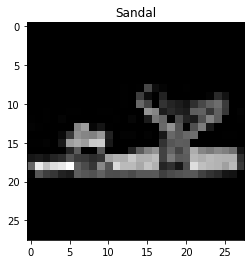

In [11]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(train_data.classes[label]);

It seems that we have 10 diffrenet classes (clothings)...Thus we are working on multi-class classification! ✌

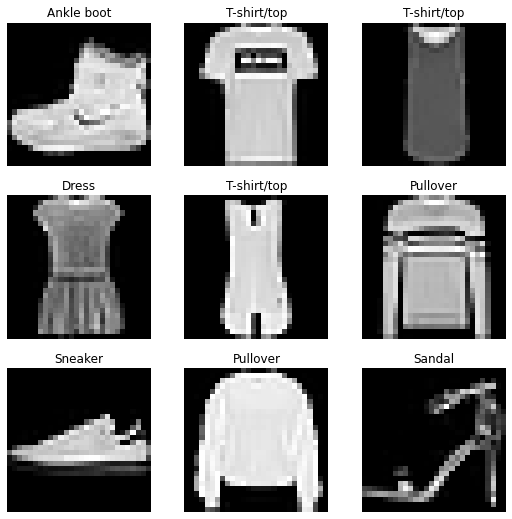

In [12]:
# ax, fig = plt.subplots(nrows=3, ncols=3)
fig = plt.figure(figsize=(9, 9))
for i in range(9):
  fig.add_subplot(3, 3, i+1)
  plt.imshow(train_data[i][0].squeeze(), cmap="gray")
  plt.title(train_data.classes[train_data[i][1]])
  plt.axis(False)

## Prepare DataLoader

The next step is to prepare it with a [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) or `DataLoader` for short.

It helps load data into a model for training and for inference.

It turns a large `Dataset` into a Python iterable of smaller chunks.

These smaller chunks are called **batches** or **mini-batches** and can be set by the `batch_size` parameter.

Why do this?

Because it's more computationally efficient.


What's a good batch size?

[32 is a good place to start](https://twitter.com/ylecun/status/989610208497360896?s=20&t=N96J_jotN--PYuJk2WcjMw).
 
Generally powers of 2 are used most often (e.g. 32, 64, 128, 256, 512).


In [13]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              shuffle=True,
                              num_workers=1)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             num_workers=1,
                             shuffle=False)

In [14]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [15]:
train_dataloader_features, train_dataloader_labels = next(iter(train_dataloader))
train_dataloader_features, train_dataloader_labels

(tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.5333, 0.5961,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000

In [16]:
train_dataloader_features.shape, train_dataloader_labels.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [17]:
train_dataloader_features[0].shape

torch.Size([1, 28, 28])

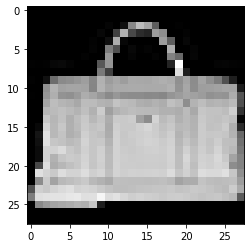

In [18]:
plt.imshow(train_dataloader_features[0].squeeze(), cmap="gray");

## Building a model (CNN)



Convolutional Neural Network (CNN or ConvNet).

CNN's are known for their capabilities to find patterns in visual data.


**Recommendation:** The CNN model we're going to be using is known as TinyVGG from the [CNN Explainer](https://poloclub.github.io/cnn-explainer/) website.

It follows the typical structure of a convolutional neural network:

`Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer`

Where the contents of `[Convolutional layer -> activation layer -> pooling layer]` can be upscaled and repeated multiple times, depending on requirements. 

Explanation about new layer:

The `nn.Flatten()` layer took our shape from `[color_channels, height, width]` to `[color_channels, height*width]`.

Why do this?

Because we've now turned our pixel data from height and width dimensions into one long **feature vector**.

And `nn.Linear()` layers like their inputs to be in the form of feature vectors.

Let's create our first model using `nn.Flatten()` as the first layer. 

In [19]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

class FashionModelV0(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()

    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=490,
                  out_features=output_shape)
    )
  
  def forward(self, x):
    return self.classifier(self.block_2(self.block_1(x)))

model_0 = FashionModelV0(input_shape=1,
                         hidden_units=10,
                         output_shape=10).to(device)

model_0

FashionModelV0(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [20]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.1)

In [21]:
!pip install torchmetrics
import torchmetrics
from torchmetrics import Accuracy

acc = Accuracy().to(device)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 419 kB 4.0 MB/s 


In [22]:
from tqdm.auto import tqdm
from timeit import default_timer as timer

start_time = timer()

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs= 3


for epoch in tqdm(range(epochs)):

  train_loss, train_acc =0, 0
  for X, y in train_dataloader:
    X, y = X.to(device), y.to(device)
    model_0.train()
    train_pred = model_0(X)
    loss = loss_fn(train_pred, y)
    train_loss += loss
    train_acc += acc(train_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  
  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)

  test_loss, test_acc =0, 0
  model_0.eval()
  with torch.inference_mode():
    for X, y in test_dataloader:
      X, y = X.to(device), y.to(device)
      test_pred = model_0(X)
      test_loss += loss_fn(test_pred, y)
      test_acc += acc(test_pred, y)

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)


  print(f"Epoch: {epoch} | train_loss: {train_loss} | train_acc: {train_acc} | test_loss: {test_loss} | test_acc: {test_acc}")

end_time= timer()

total_time = end_time - start_time
print(f"train time: {total_time} seconds")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 | train_loss: 0.5951793193817139 | train_acc: 0.7837499976158142 | test_loss: 0.3950044810771942 | test_acc: 0.8599241375923157
Epoch: 1 | train_loss: 0.3653560280799866 | train_acc: 0.8690166473388672 | test_loss: 0.35244327783584595 | test_acc: 0.8691094517707825
Epoch: 2 | train_loss: 0.3258754312992096 | train_acc: 0.8812833428382874 | test_loss: 0.32718968391418457 | test_acc: 0.88069087266922
train time: 190.485052682 seconds


> **Question:** "I used a a GPU but my model didn't train faster, why might that be?"
>
> **Answer:** Well, one reason could be because your dataset and model are both so small (like the dataset and model we're working with) the benefits of using a GPU are outweighed by the time it actually takes to transfer the data there.
> 
> There's a small bottleneck between copying data from the CPU memory (default) to the GPU memory.
>
> So for smaller models and datasets, the CPU might actually be the optimal place to compute on.
>
> But for larger datasets and models, the speed of computing the GPU can offer usually far outweighs the cost of getting the data there.
>
> However, this is largely dependant on the hardware you're using. With practice, you will get used to where the best place to train your models is. 

### Functionizing training and test loops

**alternative:** writing training and testing loops using function from now on.
For the training loop we'll create a function called `train_step()` which takes in a model, a `DataLoader` a loss function and an optimizer.

The testing loop will be similar but it'll be called `test_step()` and it'll take in a model, a `DataLoader`, a loss function and an evaluation function.

> **Note:** Since these are functions, you can customize them in any way you like. What we're making here can be considered barebones training and testing functions for our specific classification use case.

In [24]:
def train_step(model, data_loader, loss_fn, accuracy_fn, optimizer, device):
  train_loss, train_accuracy = 0, 0
  for batch, (X,y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_accuracy += accuracy_fn(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  
  train_loss /= len(data_loader)
  train_accuracy /= len(data_loader)
  print(f"train_loss: {train_loss:.5f} | train_accuracy: {train_accuracy:2f}%")

def test_step(model, data_loader, loss_fn, accuracy_fn, device):
  test_loss, test_accuracy = 0, 0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      X, y = X.to(device), y.to(device)
      test_pred = model(X)

      loss = loss_fn(test_pred, y)
      test_loss += loss
      test_accuracy += accuracy_fn(test_pred, y)

    test_loss /= len(data_loader)
    test_accuracy /= len(data_loader)
    print(f"test_loss: {test_loss:.5f} | test_accuracy: {test_accuracy:.2f}%")

In [25]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
from tqdm.auto import tqdm

# Measure time
from timeit import default_timer as timer
start_time = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_0, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=acc,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_0,
        loss_fn=loss_fn,
        accuracy_fn=acc,
        device=device
    )

end_time = timer()
training_time_model_0 = end_time - start_time
print(f"traing_time: {training_time_model_0:.2f} seconds")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
train_loss: 0.30546 | train_accuracy: 0.888667%
test_loss: 0.31997 | test_accuracy: 0.88%
Epoch: 1
---------
train_loss: 0.28938 | train_accuracy: 0.894700%
test_loss: 0.31071 | test_accuracy: 0.89%
Epoch: 2
---------
train_loss: 0.27936 | train_accuracy: 0.898333%
test_loss: 0.29529 | test_accuracy: 0.89%
traing_time: 182.09 seconds


## Save and load the model

We can save and load a PyTorch model using a combination of:
* `torch.save` - a function to save a whole PyTorch model or a model's `state_dict()`. 
* `torch.load` - a function to load in a saved PyTorch object.
* `torch.nn.Module.load_state_dict()` - a function to load a saved `state_dict()` into an existing model instance.

Let's save our `model_0`'s `state_dict()` then load it back in and evaluate it to make sure the save and load went correctly. 

In [26]:
# Saving
from pathlib import Path
Path("models").mkdir(parents=True, exist_ok=True)

torch.save(obj=model_0.state_dict(),
           f="models/pytorch_cnn_model_0.pth")

Now we've got a saved model `state_dict()` we can load it back in using a combination of `load_state_dict()` and `torch.load()`.

Since we're using `load_state_dict()`, we'll need to create a new instance of `FashionModelV0()` with the same input parameters as our saved model `state_dict()`.

In [28]:
# Loading
# Create a new instance of FashionModelV0 (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model_0 = FashionModelV0(input_shape=1, hidden_units=10, output_shape=10)

# Load in the saved state_dict() and send it to GPU
loaded_model_0.load_state_dict(torch.load("models/pytorch_cnn_model_0.pth"))
loaded_model_0.to(device)


FashionModelV0(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [34]:
# define a model to evaluate a loaded model on some target data (e.g. test data)
# This function is similar to test_step function
torch.manual_seed(42)

def evaluation_step(model, data_loader, loss_fn, accuracy_fn, device):
  model_loss, model_accuracy = 0, 0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      X, y = X.to(device), y.to(device)
      model_pred = model(X)

      loss = loss_fn(model_pred, y)
      model_loss += loss
      model_accuracy += accuracy_fn(model_pred, y)

    model_loss /= len(data_loader)
    model_accuracy /= len(data_loader)
    print(f"model_loss: {model_loss:.5f} | model_accuracy: {model_accuracy:.2f}%")
  return {"loss": model_loss.item(),
          "acc": model_accuracy.item()}

In [35]:
loaded_model_0_results = evaluation_step(model=loaded_model_0,
                data_loader=test_dataloader,
                loss_fn=loss_fn,
                accuracy_fn=acc,
                device=device)

model_loss: 0.29529 | model_accuracy: 0.89%


In [36]:
loaded_model_0_results

{'loss': 0.2952914237976074, 'acc': 0.8925718665122986}

> Model_loss and accuracy are exactly same as model_0 results. ✅